In [100]:
from setup import *
from IPython.core.display import display

movies=pd.read_csv('tmdb_5000_movies.csv')

credits=pd.read_csv('tmdb_5000_credits.csv')

#dropping the url column for the movie homepage since we don't need it
movies.drop('homepage',axis=1,inplace=True)

#getting rid of spoken languages because original language seems more appropriate to use
movies.drop('spoken_languages',axis=1,inplace=True)

#movies

df=pd.merge(movies,credits)
#df.drop('overview',axis=1,inplace=True)
df.drop('production_countries',axis=1,inplace=True)
df.drop('crew',axis=1,inplace=True)
df.drop('budget',axis=1,inplace=True)
df.drop('original_language',axis=1,inplace=True)
#df.drop('original_title',axis=1,inplace=True)
df.drop('popularity',axis=1,inplace=True)
df.drop('production_companies',axis=1,inplace=True)
df.drop('release_date',axis=1,inplace=True)
df.drop('revenue',axis=1,inplace=True)
df.drop('runtime',axis=1,inplace=True)
df.drop('status',axis=1,inplace=True)
df.drop('original_title',axis=1,inplace=True)
df.drop('vote_average',axis=1,inplace=True)
df.drop('vote_count',axis=1,inplace=True)
df.drop('cast',axis=1,inplace=True)
df.drop('movie_id',axis=1,inplace=True)



In [122]:
NANs=df.replace('[]',np.nan)
#NANs

In [123]:
#let's just find ways to get data filled in~~

replace=NANs.fillna(method='ffill')
#replace


In [124]:
#let's get one main genre
def getGenre(x):
    import re
    splitting=re.split(r'\W+', x)
    genre=splitting[4]
    return genre


replace['genres']=replace['genres'].apply(getGenre)
#replace

In [125]:
#let's get one main keyword

def getKeyWord(x):
    import re
    getWords=re.split(r'\W+', x)
    keyword=getWords[4]
    return keyword
replace['keywords']=replace['keywords'].apply(getKeyWord)
replace

,genres,id,keywords,overview,tagline,title
0,Action,19995,culture,"In the 22nd century, a paraplegic Marine is di...",Enter the World of Pandora.,Avatar
1,Adventure,285,ocean,"Captain Barbossa, long believed to be dead, ha...","At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End
2,Action,206647,spy,A cryptic message from Bond’s past sends him o...,A Plan No One Escapes,Spectre
3,Action,49026,dc,Following the death of District Attorney Harve...,The Legend Ends,The Dark Knight Rises
4,Action,49529,based,"John Carter is a war-weary, former military ca...","Lost in our world, found in another.",John Carter
5,Fantasy,559,dual,The seemingly invincible Spider-Man goes up ag...,The battle within.,Spider-Man 3
6,Animation,38757,hostage,When the kingdom's most wanted-and most charmi...,They're taking adventure to new lengths.,Tangled
7,Action,99861,marvel,When Tony Stark tries to jumpstart a dormant p...,A New Age Has Come.,Avengers: Age of Ultron
8,Adventure,767,witch,"As Harry begins his sixth year at Hogwarts, he...",Dark Secrets Revealed,Harry Potter and the Half-Blood Prince
9,Action,209112,dc,Fearing the actions of a god-like Super Hero l...,Justice or revenge,Batman v Superman: Dawn of Justice


In [126]:
#now let's see how many genres we got
genreList=replace.genres.unique()
genreList

array(['Action', 'Adventure', 'Fantasy', 'Animation', 'Science', 'Drama',
       'Thriller', 'Family', 'Comedy', 'History', 'War', 'Western',
       'Romance', 'Crime', 'Mystery', 'Horror', 'Documentary', 'Music',
       'TV', 'Foreign'], dtype=object)

In [127]:
#genre distribution?
themGenres=replace.groupby('genres').count()
themGenres.drop('id',axis=1,inplace=True)
themGenres.drop('keywords',axis=1,inplace=True)
themGenres.drop('overview',axis=1,inplace=True)
themGenres.drop('tagline',axis=1,inplace=True)
#themGenres

In [128]:
#let's look at the percentage
themGenres['perc'] = 100*themGenres.title/themGenres.title.sum()
themGenres

,title,perc
genres,,
Action,759,15.782907
Adventure,340,7.070077
Animation,123,2.557704
Comedy,1047,21.771678
Crime,197,4.096486
Documentary,91,1.892285
Drama,1216,25.285922
Family,57,1.185278
Fantasy,118,2.453733


In [129]:
#using title to predict genres

#categories are in genreList


from sklearn.model_selection import train_test_split


train, test = train_test_split(replace, test_size=0.15)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model=make_pipeline(TfidfVectorizer(stop_words='english',smooth_idf=True,norm='l1'),MultinomialNB())
model.fit(train.title, train.genres)
pred=model.predict(test.title)

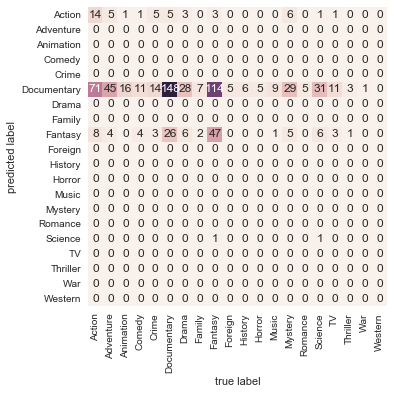

In [130]:


from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


mat=confusion_matrix(test.genres,pred,labels=genreList)
sns.heatmap(mat.T,square=True, annot=True, fmt='d',cbar=False,
        xticklabels=sorted(replace['genres'].unique()),yticklabels=sorted(replace['genres'].unique()))
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()

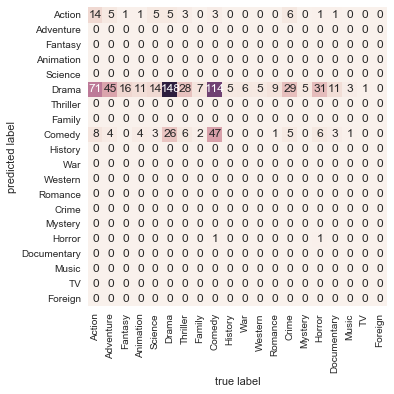

In [131]:

mat=confusion_matrix(test.genres,pred,labels=genreList)
sns.heatmap(mat.T,square=True, annot=True, fmt='d',cbar=False,
        xticklabels=genreList,yticklabels=genreList)
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()

In [132]:
trainTag, testTag = train_test_split(replace, test_size=0.25)


modelTag=make_pipeline(TfidfVectorizer(stop_words='english',smooth_idf=True,norm='l1'),MultinomialNB())
modelTag.fit(train.tagline, train.genres)
pred=modelTag.predict(test.tagline)

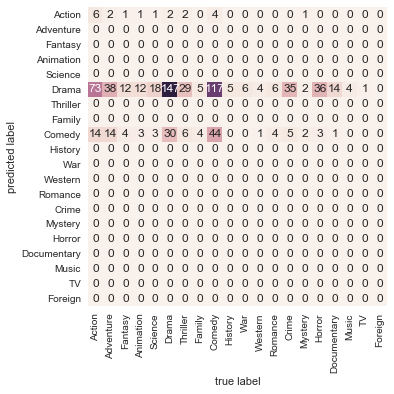

In [133]:
matTag=confusion_matrix(test.genres,pred,labels=genreList)
sns.heatmap(matTag.T,square=True, annot=True, fmt='d',cbar=False,
        xticklabels=genreList,yticklabels=genreList)
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()

In [134]:
trainOver, testOver = train_test_split(replace, test_size=0.25)


modelOver=make_pipeline(TfidfVectorizer(stop_words='english',smooth_idf=True,norm='l1'),MultinomialNB())
modelOver.fit(train.overview, train.genres)
pred=modelOver.predict(test.overview)

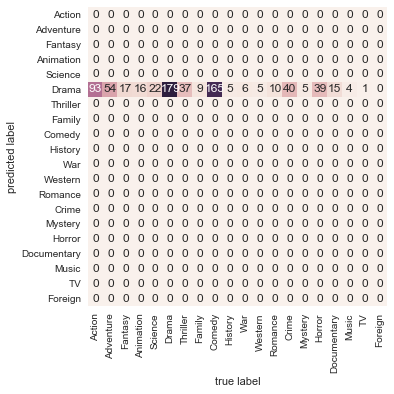

In [135]:
matTag=confusion_matrix(test.genres,pred,labels=genreList)
sns.heatmap(matTag.T,square=True, annot=True, fmt='d',cbar=False,
        xticklabels=genreList,yticklabels=genreList)
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()

In [136]:
trainKey, testKey = train_test_split(replace, test_size=0.25)


modelKey=make_pipeline(TfidfVectorizer(stop_words='english',smooth_idf=True,norm='l1'),MultinomialNB())
modelKey.fit(train.keywords, train.genres)
pred=modelKey.predict(test.keywords)

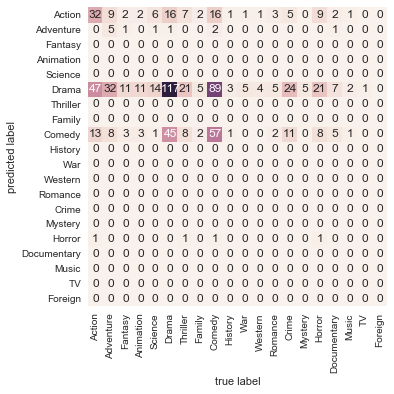

In [137]:
matKey=confusion_matrix(test.genres,pred,labels=genreList)
sns.heatmap(matKey.T,square=True, annot=True, fmt='d',cbar=False,
        xticklabels=genreList,yticklabels=genreList)
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()

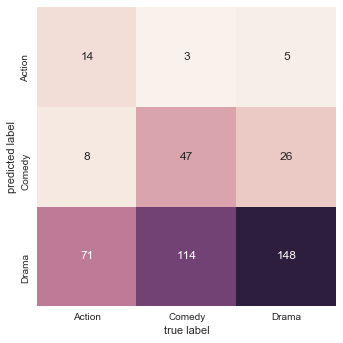

In [138]:
#predicting only Action,Drama and Comedy

ACD=['Action', 'Comedy', 'Drama']

trainTitle, testTitle = train_test_split(replace, test_size=0.25)


modelTitle=make_pipeline(TfidfVectorizer(stop_words='english',smooth_idf=True,norm='l1'),MultinomialNB())
modelTitle.fit(train.title, train.genres)
pred=modelTitle.predict(test.title)


matTitle=confusion_matrix(test.genres,pred,labels=ACD)
sns.heatmap(matTitle.T,square=True, annot=True, fmt='d',cbar=False,
        xticklabels=ACD,yticklabels=ACD)
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()

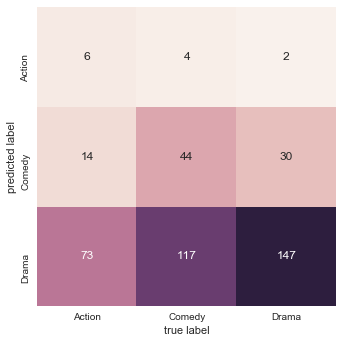

In [139]:
trainTAG2, testTAG2 = train_test_split(replace, test_size=0.25)


modelTAG2=make_pipeline(TfidfVectorizer(stop_words='english',smooth_idf=True,norm='l1'),MultinomialNB())
modelTAG2.fit(train.tagline, train.genres)
pred=modelTAG2.predict(test.tagline)


matTAG2=confusion_matrix(test.genres,pred,labels=ACD)
sns.heatmap(matTAG2.T,square=True, annot=True, fmt='d',cbar=False,
        xticklabels=ACD,yticklabels=ACD)
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()

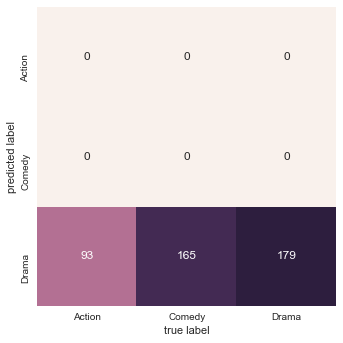

In [140]:
trainOVER, testOVER = train_test_split(replace, test_size=0.25)


modelOVER=make_pipeline(TfidfVectorizer(stop_words='english',smooth_idf=True,norm='l1'),MultinomialNB())
modelOVER.fit(train.overview, train.genres)
pred=modelOVER.predict(test.overview)


matOVER=confusion_matrix(test.genres,pred,labels=ACD)
sns.heatmap(matOVER.T,square=True, annot=True, fmt='d',cbar=False,
        xticklabels=ACD,yticklabels=ACD)
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()

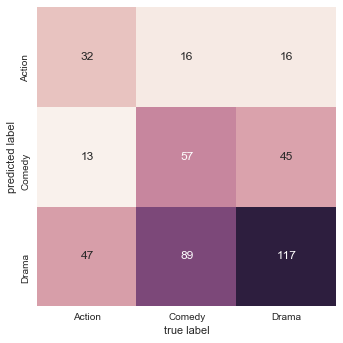

In [141]:
trainKEY, testKEY = train_test_split(replace, test_size=0.25)


modelKEY=make_pipeline(TfidfVectorizer(stop_words='english',smooth_idf=True,norm='l1'),MultinomialNB())
modelKEY.fit(train.keywords, train.genres)
pred=modelKEY.predict(test.keywords)


matKEY=confusion_matrix(test.genres,pred,labels=ACD)
sns.heatmap(matKEY.T,square=True, annot=True, fmt='d',cbar=False,
        xticklabels=ACD,yticklabels=ACD)
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()